## 1. Import libraries

In [1]:
# pip install scikit-learn-extra

In [2]:
import PIL
from PIL import Image
from PIL import ImageFile
import numpy as np
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

import pandas as pd
from pylab import rcParams
import seaborn as sb
import sklearn

from sklearn.cluster import DBSCAN
from collections import Counter

from sklearn.cluster import MeanShift

from sklearn.metrics import silhouette_score

## 2. Open image and obtain relevant RGBA code

In [3]:
# Open image
imgfile = Image.open("../pictures/wo_background/ohhowstrange/ohhowstrange_2021-05-31_1.png")
new_size = (200,200)
imgfile2 = imgfile.resize(new_size)
# Only pass through non-transparent pixels, i.e. those where A>200 in the RGBA quad
na = np.array([f for f in imgfile2.getdata() if f[3] >200], np.uint8)

In [4]:
na

array([[186, 169, 135, 226],
       [197, 180, 143, 242],
       [200, 181, 143, 252],
       ...,
       [  8,   8,  10, 254],
       [  9,   9,  11, 254],
       [  8,   8,  10, 255]], dtype=uint8)

In [5]:
len(na)

13078

## 3. K-means clustering

In [6]:
%%time
clt = KMeans(n_clusters = 2, max_iter=500, random_state=5)
clt.fit(na)

CPU times: user 165 ms, sys: 62.3 ms, total: 227 ms
Wall time: 42.1 ms


KMeans(max_iter=500, n_clusters=2, random_state=5)

In [7]:
x = clt.cluster_centers_
x

array([[ 29.37334049,  21.93777659,  20.3250637 , 253.73796433],
       [195.16224871, 181.31471268, 171.31275574, 253.30154777]])

In [8]:
silhouette_score(na, clt.labels_, metric='euclidean')

0.7889624022831003

In [9]:
def palette(clusters):
    height = 50
    width = 300
    palette = np.zeros((height, width, 4), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

In [10]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

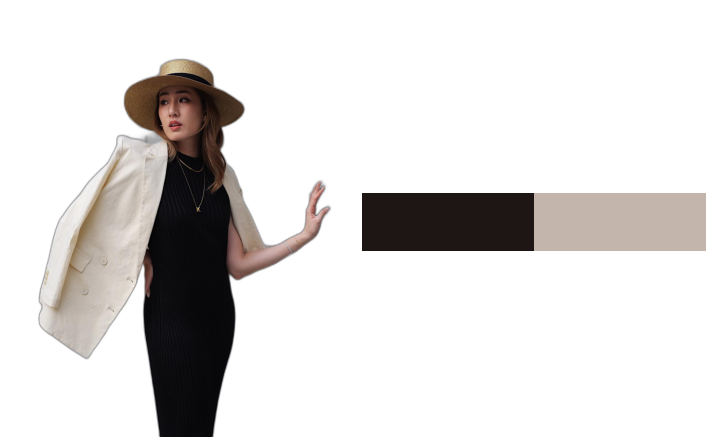

In [11]:
show_img_compar(imgfile, palette(clt))

In [12]:
clt3 = KMeans(n_clusters = 3, max_iter=500, random_state=5)
clt3.fit(na)

KMeans(max_iter=500, n_clusters=3, random_state=5)

In [13]:
silhouette_score(na, clt3.labels_, metric='euclidean')

0.7151259643644502

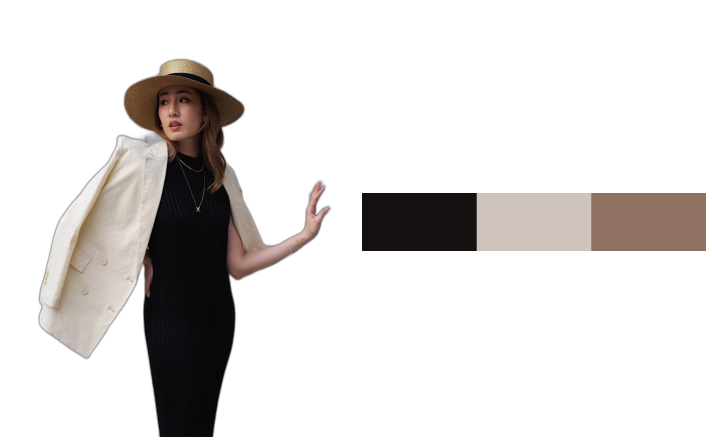

In [14]:
show_img_compar(imgfile, palette(clt3))

## 4. DBScan

In [15]:
%%time
model = DBSCAN(min_samples = 500).fit(na)

CPU times: user 94 ms, sys: 5.13 ms, total: 99.1 ms
Wall time: 98.4 ms


In [16]:
len(model.labels_)

13078

In [17]:
np.unique(model.labels_)

array([-1,  0,  1])

In [18]:
len(model.core_sample_indices_)

1124

# 5. Mean-shift clustering

In [19]:
%%time
clustering = MeanShift(bin_seeding = True, cluster_all = False).fit(na)

CPU times: user 6.61 s, sys: 50.3 ms, total: 6.66 s
Wall time: 6.65 s


In [20]:
clustering.cluster_centers_

array([[ 13.5145664 ,  11.97340786,  13.73865176, 254.11348238],
       [204.4328928 , 194.72305433, 186.66343612, 253.50220264],
       [ 72.39416984,  47.43346008,  34.76932826, 253.09632446]])

In [21]:
silhouette_score(na, clustering.labels_, metric='euclidean')

0.6155078777244857

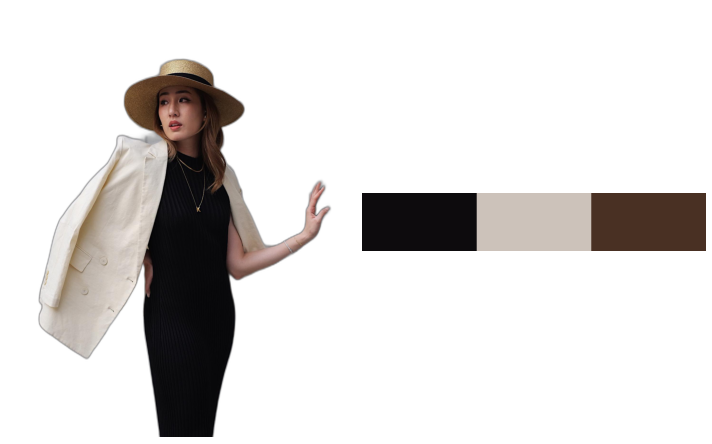

In [22]:
show_img_compar(imgfile, palette(clustering))